In [1]:
#  Import Libraries and Load Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import (RFE, mutual_info_classif, chi2, SelectKBest, f_classif)
from sklearn.metrics import accuracy_score, f1_score
from sklearn.decomposition import PCA, FactorAnalysis, FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

# Load dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

print(X.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


## Part 1: Feature Selection Techniques
We will try multiple methods of selecting the most important features.


In [2]:
model = LogisticRegression(max_iter=200)
rfe = RFE(model, n_features_to_select=2)
rfe.fit(X, y)

selected = X.columns[rfe.support_]
print("Selected Features by RFE:", list(selected))


Selected Features by RFE: ['petal length (cm)', 'petal width (cm)']


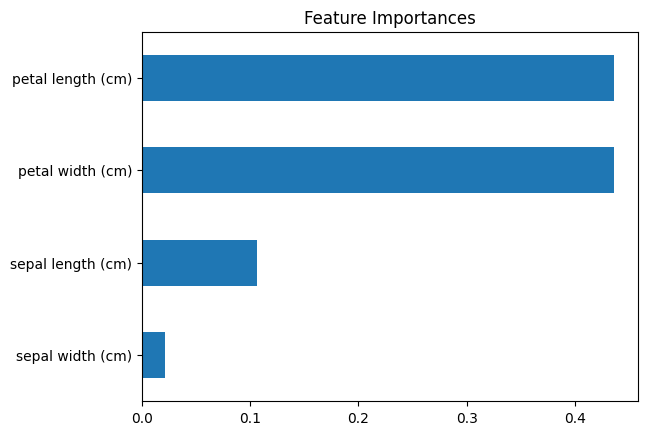

In [3]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind="barh", title="Feature Importances")
plt.show()


In [4]:
mi = mutual_info_classif(X, y)
mi_series = pd.Series(mi, index=X.columns)
print("Mutual Information Scores:\n", mi_series.sort_values(ascending=False))


Mutual Information Scores:
 petal length (cm)    0.987473
petal width (cm)     0.975524
sepal length (cm)    0.451757
sepal width (cm)     0.278498
dtype: float64


In [5]:
X_norm = MinMaxScaler().fit_transform(X)
chi_scores, p_vals = chi2(X_norm, y)
chi_series = pd.Series(chi_scores, index=X.columns)
print("Chi-Square Scores:\n", chi_series.sort_values(ascending=False))


Chi-Square Scores:
 petal width (cm)     30.478068
petal length (cm)    26.861936
sepal length (cm)    11.377274
sepal width (cm)      4.470734
dtype: float64


In [6]:
X_norm = MinMaxScaler().fit_transform(X)
chi_scores, p_vals = chi2(X_norm, y)
chi_series = pd.Series(chi_scores, index=X.columns)
print("Chi-Square Scores:\n", chi_series.sort_values(ascending=False))


Chi-Square Scores:
 petal width (cm)     30.478068
petal length (cm)    26.861936
sepal length (cm)    11.377274
sepal width (cm)      4.470734
dtype: float64


In [7]:
anova = SelectKBest(f_classif, k=2).fit(X, y)
print("Top 2 Features by ANOVA:", list(X.columns[anova.get_support()]))


Top 2 Features by ANOVA: ['petal length (cm)', 'petal width (cm)']


In [8]:
lasso = LassoCV().fit(X, y)
coeff = pd.Series(lasso.coef_, index=X.columns)
print("Lasso Coefficients:\n", coeff)


Lasso Coefficients:
 sepal length (cm)   -0.105659
sepal width (cm)    -0.033804
petal length (cm)    0.234634
petal width (cm)     0.589298
dtype: float64


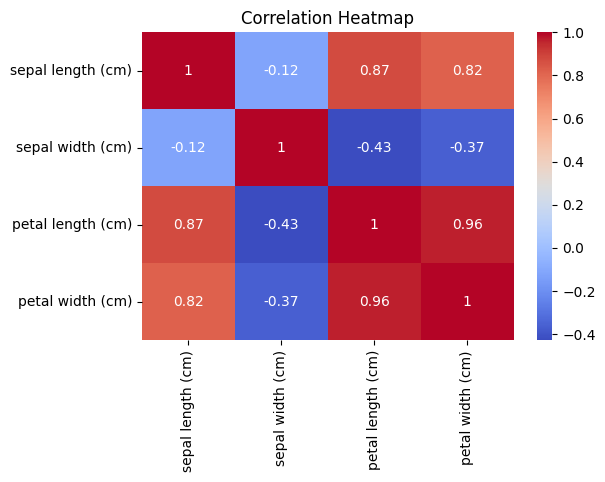

In [9]:
plt.figure(figsize=(6,4))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


## Part 2: Dimensionality Reduction
Now we reduce features using transformation-based techniques.


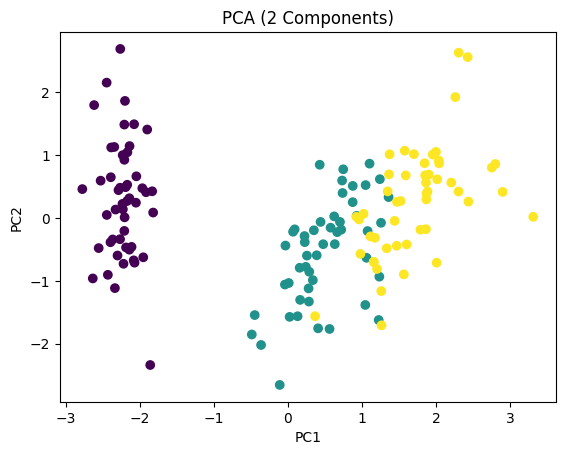

Explained Variance: [0.72962445 0.22850762]


In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="viridis")
plt.title("PCA (2 Components)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

print("Explained Variance:", pca.explained_variance_ratio_)


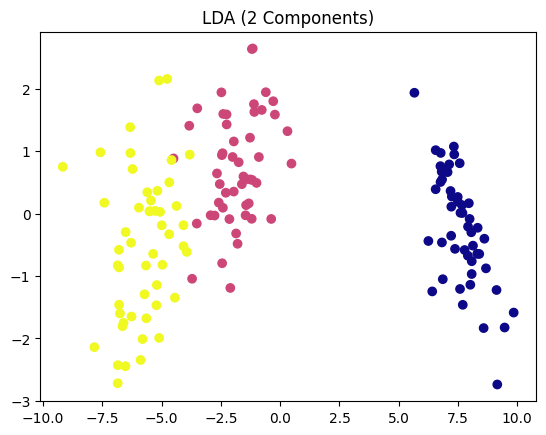

In [11]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

plt.scatter(X_lda[:,0], X_lda[:,1], c=y, cmap="plasma")
plt.title("LDA (2 Components)")
plt.show()


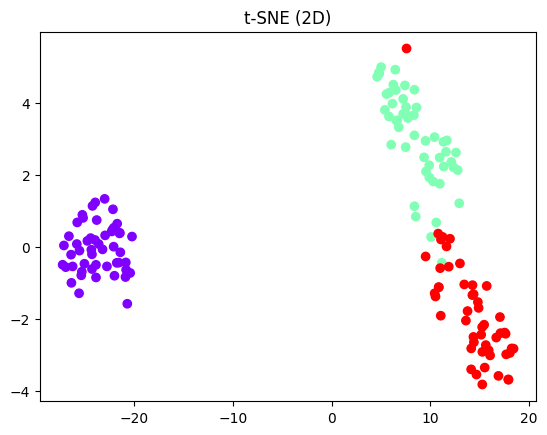

In [12]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap="rainbow")
plt.title("t-SNE (2D)")
plt.show()


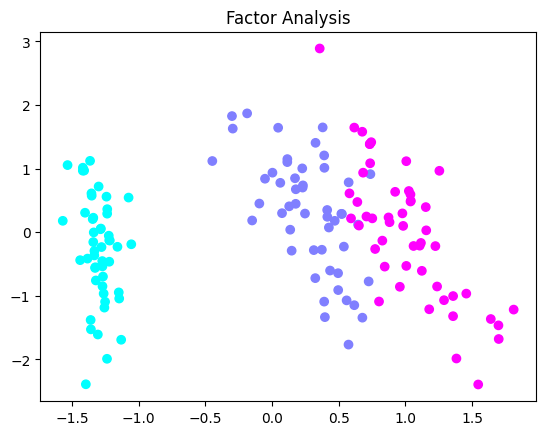

In [13]:
fa = FactorAnalysis(n_components=2)
X_fa = fa.fit_transform(X)

plt.scatter(X_fa[:,0], X_fa[:,1], c=y, cmap="cool")
plt.title("Factor Analysis")
plt.show()


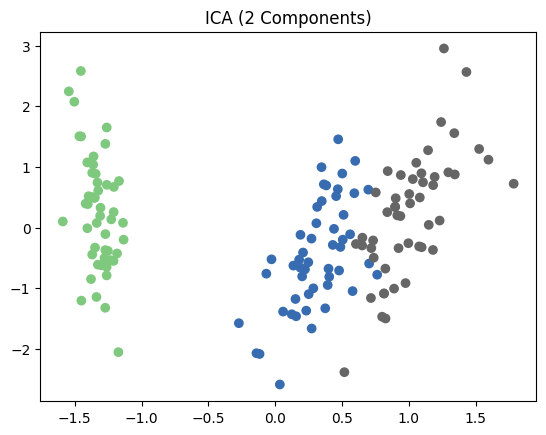

In [14]:
ica = FastICA(n_components=2, random_state=42)
X_ica = ica.fit_transform(X)

plt.scatter(X_ica[:,0], X_ica[:,1], c=y, cmap="Accent")
plt.title("ICA (2 Components)")
plt.show()


## Part 3: Model Evaluation
We test Logistic Regression with:
1. All features
2. Selected features
3. Reduced features


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. All Features
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("All Features - Accuracy:", accuracy_score(y_test, y_pred))

# 2. RFE Selected Features
X_train_sel, X_test_sel = X_train[selected], X_test[selected]
clf.fit(X_train_sel, y_train)
print("RFE Features - Accuracy:", accuracy_score(y_test, clf.predict(X_test_sel)))

# 3. PCA Features
X_pca_train, X_pca_test = PCA(n_components=2).fit_transform(X_train), PCA(n_components=2).fit_transform(X_test)
clf.fit(X_pca_train, y_train)
print("PCA (2 comps) - Accuracy:", accuracy_score(y_test, clf.predict(X_pca_test)))


All Features - Accuracy: 1.0
RFE Features - Accuracy: 1.0
PCA (2 comps) - Accuracy: 0.9666666666666667


# Conclusion

### Feature Selection
- **RFE (Recursive Feature Elimination)** identified `petal length` and `petal width` as the most important features.  
- **Random Forest feature importance** also ranked petal-based features highest, confirming their importance.  
- **Mutual Information, Chi-Square, and ANOVA tests** gave consistent results, showing that petal dimensions are most discriminative.  
- Accuracy with selected features was **the same as using all features (100%)**, which proves that simpler models with fewer features can perform equally well.

### Dimensionality Reduction
- **PCA** reduced the dataset to 2 components and still achieved ~97% accuracy. It preserves variance but slightly reduced performance compared to original features.  
- **LDA** produced strong class separation in the reduced space, making it effective for classification tasks.  
- **t-SNE** gave the clearest visualization of clusters, showing excellent separation of species, though it is more for visualization than classification.  
- **Factor Analysis and ICA** also reduced dimensions but are harder to interpret compared to PCA and LDA.  

### Trade-offs
- **Feature Selection** keeps the most important *original features* → improves interpretability, reduces complexity, and can maintain or even improve performance.  
- **Dimensionality Reduction** creates *new transformed features* → useful for visualization and when working with very high-dimensional data, but sometimes sacrifices interpretability.  

### Final Notes
For the Iris dataset:  
- Feature selection methods showed that only **two features are enough** for perfect classification.  
- Dimensionality reduction methods provided excellent **visualizations and clustering**, but slightly lower accuracy.  

Thus, the choice depends on the goal:  
- If interpretability and simplicity are key → use **Feature Selection**.  
- If visualization and handling many correlated features are important → use **Dimensionality Reduction**.
